In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from base.tools import find_roi
import nibabel as nib

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
from neurosynth.base.dataset import Dataset
from neurosynth import imageutils
dataset = Dataset.load("../data/datasets/abs_60topics_filt_jul.pkl")

In [56]:
rois_40 = ['PCC', 'LOcc', 'Thal', 'MVis', 'dACC', 'Cereb', 'SII', 'LFP', 'STS', 'VS', 'Mentalizing', 'IFS', 'Occ/MTG',
 'LPreMotor', 'Auditory', 'IFGt', 'pIns', 'LVis', 'LSOcc', 'SMA', 'lIFG', 'Subcort', 'Amyg', 'SPar', 'vmPFC', 'LOccinf',
'LPar/MFG', 'Supramarg', 'aIns', 'pSMA', 'Hipp', 'BStem', 'LOCCsup', 'LOFC', 'Noise', 'Pall', 'pSMG', 'S1', 'Caudate', 'PreCun/SFG']

In [57]:
rois_40 = dict(zip(range(0, 40), rois_40))

## Coactivation variability

In [6]:
def get_ids_custom_mask(mask, threshold=0.05):
    num_vox = np.sum(mask)
    prop_mask_active = dataset.image_table.data.T.dot(mask).astype(float)
    if isinstance(threshold, float):
        prop_mask_active /= num_vox
    indices = np.where(prop_mask_active > threshold)[0]
    return indices

In [3]:
mask_file = '../masks/wash_u/Power_8mm.nii.gz'

In [7]:
regions = np.round(imageutils.load_imgs(mask_file, dataset.masker))

In [9]:
# results = []
# for i in np.unique(regions):
#     print i
#     if i > 0:
#         ids = get_ids_custom_mask((regions == i).astype(bool))
#         results.append(np.apply_along_axis(np.var, 1, dataset.get_image_data(ids=ids)).mean())

0.0
1.0
2.0
3.0


/Users/aleph4/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


KeyboardInterrupt: 

In [ ]:
results.sort()

In [ ]:
np.array(results).min()

In [17]:
from base import tools

In [ ]:
tools.make_mask_map(results, mask_file, 'ns_150_var')

## Co-activation as it varies with semantics

In [7]:
cog_topics = [1, 2, 4, 5, 6, 7, 9, 10, 11, 12, 15, 19, 20, 23, 26, 27, 29, 30, 32, 34, 35, 37, 38, 39, 40, 44, 48, 49, 50, 53, 57, 58, 59]

In [4]:
import neurosynth.analysis.reduce as rd
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import scale

In [9]:
def diff_coact_analysis(dataset, feature, rois, threshold=0.001):
    feature_ids = dataset.get_studies(features=feature, frequency_threshold=threshold)
        
    all_ids = dataset.image_table.ids
    other_ids = list(set(all_ids) - set(feature_ids))
    
    feature_data = rd.average_within_regions(dataset.get_image_data(ids=feature_ids), rois, masker=dataset.masker)
    other_data = rd.average_within_regions(dataset.get_image_data(ids=other_ids), rois, masker=dataset.masker)
    
    feature_coact = 1 - pairwise_distances(feature_data, metric='correlation')
    other_coact = 1 - pairwise_distances(other_data, metric='correlation' )
    
    
    return feature_coact, other_coact

In [ ]:
### Permutation test
# from copy import deepcopy
# from random import shuffle
# ran_ds = deepcopy(dataset)

# feature_coact_perm = []
# other_coact_perm = []
# for i in range(0, 15):
#     ran_ds.image_table.data = shuffle(ran_ds.image_table.data)
#     feature_coact, other_coact = diff_coact_analysis(ran_ds, 'topic27',
#                                         '../masks/new_neurosynth/whole_brain_k_means/whole_brain_kmeans_k40/cluster_labels.nii.gz')
#     feature_coact_perm.append(feature_coact)
#     other_coact_perm.append(other_coact)
    
# feature_coact_perm = np.dstack(feature_coat_perm)
# other_coact_perm = np.dstack(other_coact_perm)
# diff_coact_perm = feature_coact_perm - other_coact_perm
# mean_fcp = np.dstack(feature_coat_perm).mean(axis=2)

In [ ]:
(3.090232 * np.dstack(feature_coat_perm).std(axis=2).mean()) + np.dstack(feature_coat_perm).mean(axis=2).mean()
mean_fcp.mean()

In [25]:
img_name = '../masks/wash_u/Power_8mm.nii.gz'
# img_name = '../masks/new_neurosynth/whole_brain_k_means/whole_brain_kmeans_k40/cluster_labels.nii.gz'
img = nib.load(img_name)

In [73]:
def zscore(x):
    return (x - x.mean()) / x.std()

### All region co-activation

In [58]:
all_studies = rd.average_within_regions(dataset.get_image_data(), img_name, masker=dataset.masker)

NameError: name 'rd' is not defined

In [ ]:
feature_coact = pairwise_distances(all_studies, metric='correlation')

In [5]:
peaks = pd.read_csv('../masks/wash_u/Consensus264.csv')
roi_communities = peaks[['ROI', 'Community']].rename(columns={'ROI' : 'region', 'Community' : 'community'})
short_hand = {'Uncertain': 'UC', 'Sensory/somatomotor Hand' : 'Sens_hand', 'Sensory/somatomotor Mouth' : 'Sens_hand', 
 'Cingulo-opercular Task Control': 'CON', 'Auditory':'Auditory', 'Default mode' : 'Default', 'Memory retrieval?' :'Memory',
 'Ventral attention' : 'VAtt', 'Visual' : 'Visual', 'Fronto-parietal Task Control' : 'FPN',
       'Salience':'Salience', 'Subcortical':'Subcortical', 'Cerebellar':'Cerebellar', 'Dorsal attention':'DAtt'}
roi_communities['comm'] = roi_communities.community.map(short_hand)

In [60]:
plt.figure(figsize=(50, 40))
data = tools.mask_diagonal(np.ma.masked_array(1-feature_coact))
sns.heatmap(data, cmap=plt.get_cmap('viridis'), linewidths=0, 
            square=True, cbar=False, yticklabels=roi_communities.comm, robust=True, mask=data.mask)

NameError: name 'feature_coact' is not defined

In [6]:
topic_names = pd.read_csv('../data/unprocessed/abstract_topics_filtered/topic_sets/topic_keys60-july_cognitive.csv')
topic_names.topic = 'topic' + topic_names.topic.astype('str')

In [7]:
topic_names = topic_names[topic_names.cognitive == 'T'].drop(['words', 'cognitive'], axis = 1)

In [ ]:
# coact_bytopic = []
# for topic in ['topic11', 'topic59', 'topic37']:
#     feature_coact, other_coact = diff_coact_analysis(dataset, topic, img_name, threshold=0.002)
#     feat_coact = pd.melt(pd.DataFrame(feature_coact).reset_index().rename(columns={'index' : 'region_a'}), 
#             id_vars='region_a', var_name='region_b', value_name='feature_distance').dropna()
#     feat_coact['other_distance'] = pd.melt(pd.DataFrame(other_coact).reset_index().rename(columns={'index' : 'region_a'}), 
#             id_vars='region_a', var_name='region_b', value_name='other_distance').dropna().other_distance
#     feat_coact['topic'] = topic
#     feat_coact['feature_distance_z'] = zscore(feat_coact.feature_distance)
#     feat_coact['other_distance_z'] = zscore(feat_coact.other_distance)
#     feat_coact['diff_dist_z'] = feat_coact.feature_distance_z - feat_coact.other_distance_z
    
#     coact_bytopic.append(feat_coact)

In [ ]:
coact_bytopic = pd.concat(coact_bytopic)

In [8]:
coact_bytopic = pd.read_csv('../results/topic_variability_power.csv')

In [9]:
# coact_bytopic['roi_a'] = coact_bytopic.region_a.map(rois_40)
# coact_bytopic['roi_b'] = coact_bytopic.region_b.map(rois_40)

In [10]:
coact_bytopic = pd.merge(coact_bytopic, topic_names )

In [ ]:
flat_fdz = coact_bytopic.pivot_table(index='Unnamed: 0', columns='nickname', values='feature_distance_z')

In [ ]:
np.corrcoef(flat_fdz).mean()

In [ ]:
from base import tools

In [ ]:
tools.flat_fdz.values

In [ ]:
sns.corrplot(flat_fdz)

In [ ]:
np.corrcoef(flat_fdz.values.T).mean()

In [ ]:
flat_fdz.shape

In [ ]:
sns.distplot(np.corrcoef(flat_fdz.values.T).flatten())

In [ ]:
from base import tools
sns.distplot(masked_diag.data[masked_diag.mask != True])

In [ ]:
masked_diag.data[masked_diag.mask != True].mean()

In [ ]:
flat_fdz.corr()['working memory'].mean()

In [ ]:
masked_diag = tools.mask_diagonal(np.ma.masked_array(flat_fdz.corr().values))

In [ ]:
coact_bytopic[coact_bytopic.topic == 'WM']

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(coact_bytopic[coact_bytopic.nickname == 'working memory'].pivot_table(index='region_a', columns='region_b', values='feature_distance_z'), cmap=plt.get_cmap('viridis'), vmax=5)

In [ ]:
coact_bytopic.shape

In [ ]:
coact_bytopic[coact_bytopic.nickname == 'emotion']

In [ ]:
from scipy.stats import pearsonr
pearsonr(coact_bytopic[coact_bytopic.nickname == 'LTM'].pivot_table(index='region_a', columns='region_b', values='feature_distance_z').values.flatten(), coact_bytopic[coact_bytopic.nickname == 'vision-shape'].pivot_table(index='region_a', columns='region_b', values='feature_distance_z').values.flatten())


In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(coact_bytopic[coact_bytopic.nickname == 'emotion'].pivot_table(index='region_a', columns='region_b', values='feature_distance_z'), cmap=plt.get_cmap('viridis'), vmax=5)

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(coact_bytopic.pivot_table(index='region_a', columns='region_b', values='feature_distance_z', aggfunc=np.mean), cmap=plt.get_cmap('viridis'), vmin=-2, vmax=5)

In [ ]:
plt.figure(figsize=(30, 25))

data = tools.mask_diagonal(coact_bytopic.pivot_table(index='region_a', columns='region_b', values='diff_dist_z', aggfunc=np.mean))
sns.heatmap(data, cmap=plt.get_cmap('viridis'),mask=data.mask, vmin=-0.5, vmax=0.5, yticklabels=roi_communities.community)

In [30]:
def heat_map_coact(coact_bytopic, topic, thr_low=None, thr_high=None):
    plt.figure(figsize=(30, 25))
    data = coact_bytopic[coact_bytopic.nickname == topic].pivot(index='region_a', columns='region_b', values='feature_distance_z')
    
    mask = None
    if thr_high is not None and thr_low is not None:
        mask = (data < thr_high) & (data > thr_low)
    elif thr_high is not None:
        mask = (data < thr_high)
    elif thr_low is not None:
        mask = (data > thr_low)
        
    from base.tools import mask_diagonal
    
    data = mask_diagonal(np.ma.masked_array(data))
    if mask is None:
        mask = data.mask
        
    ax = plt.axes()
    sns.heatmap(data, cmap=plt.get_cmap('viridis'), mask=mask, robust=True)
    ax.set_title(topic)
    plt.show()

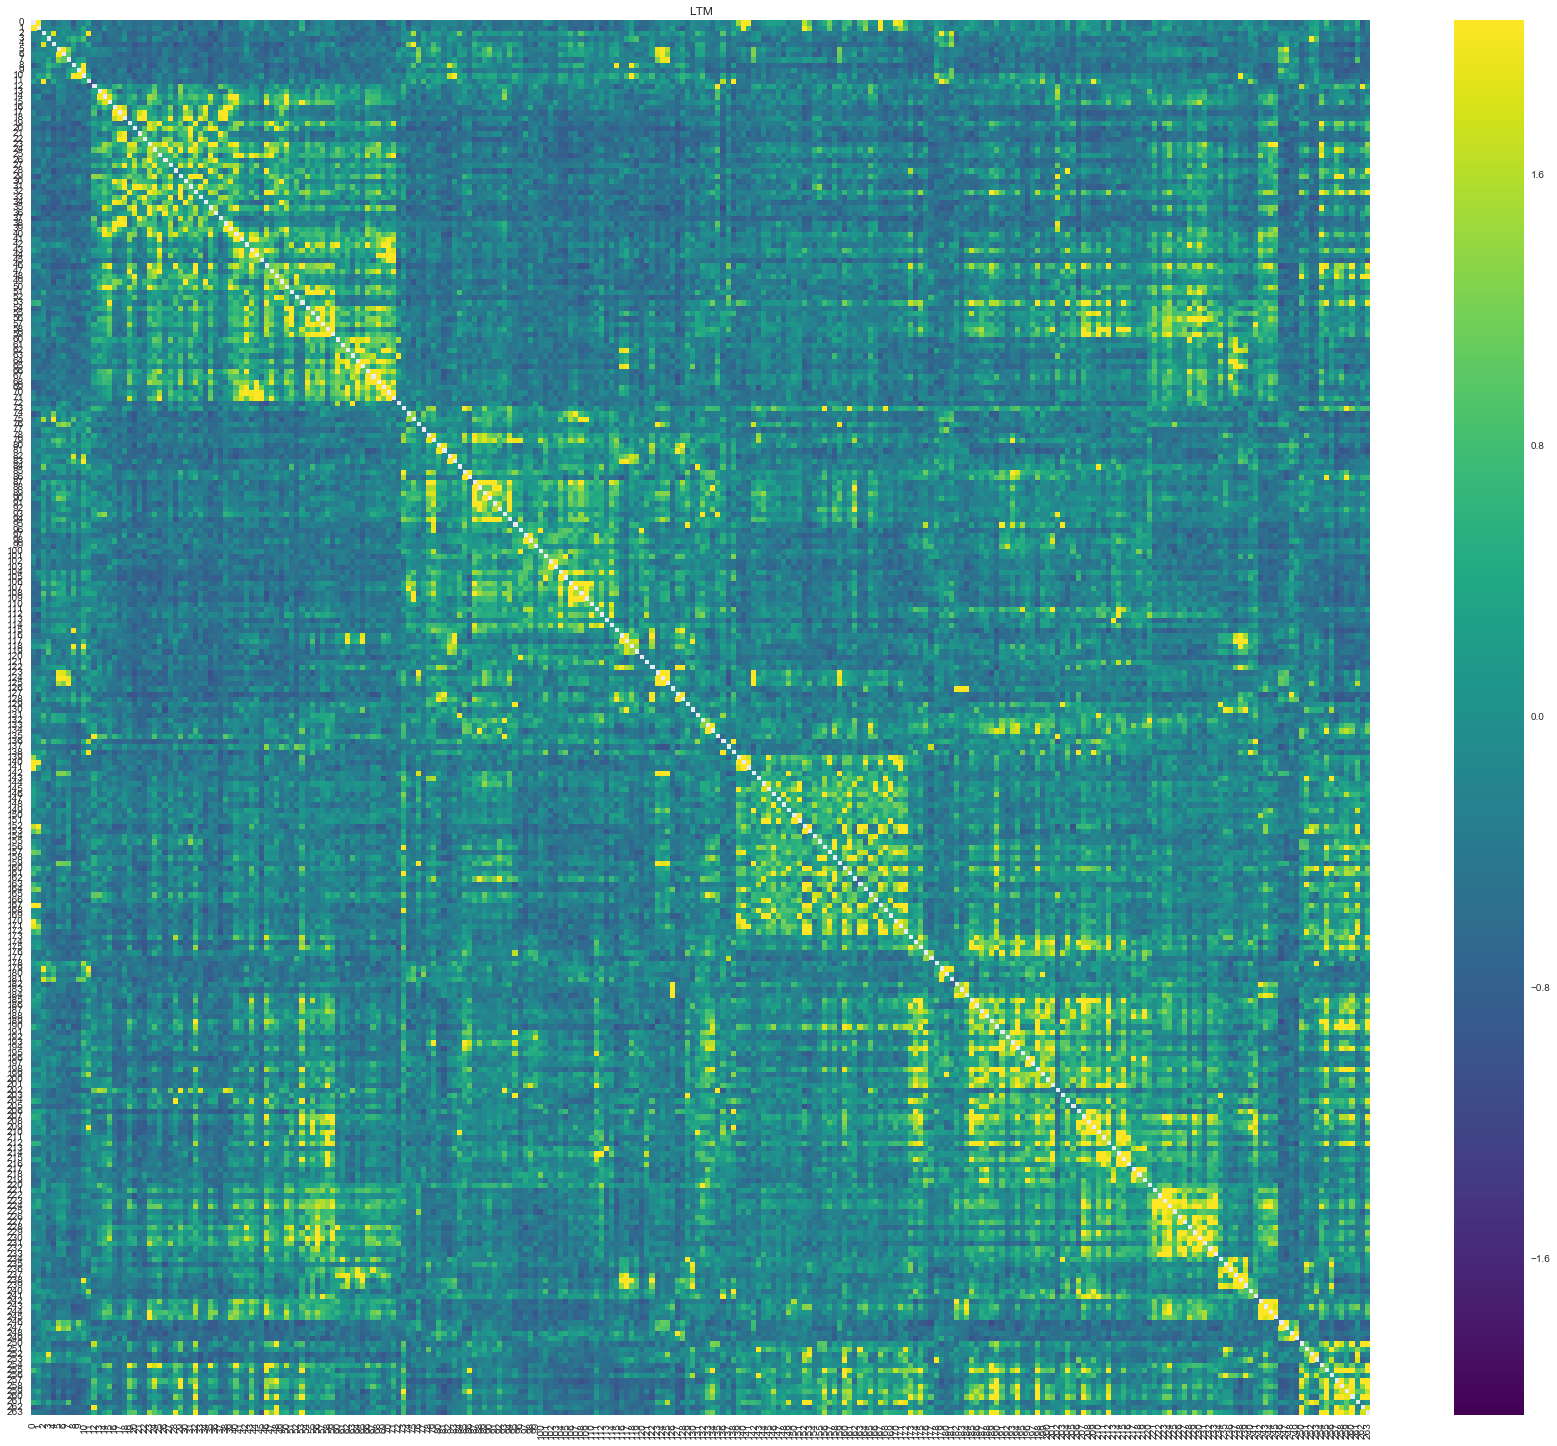

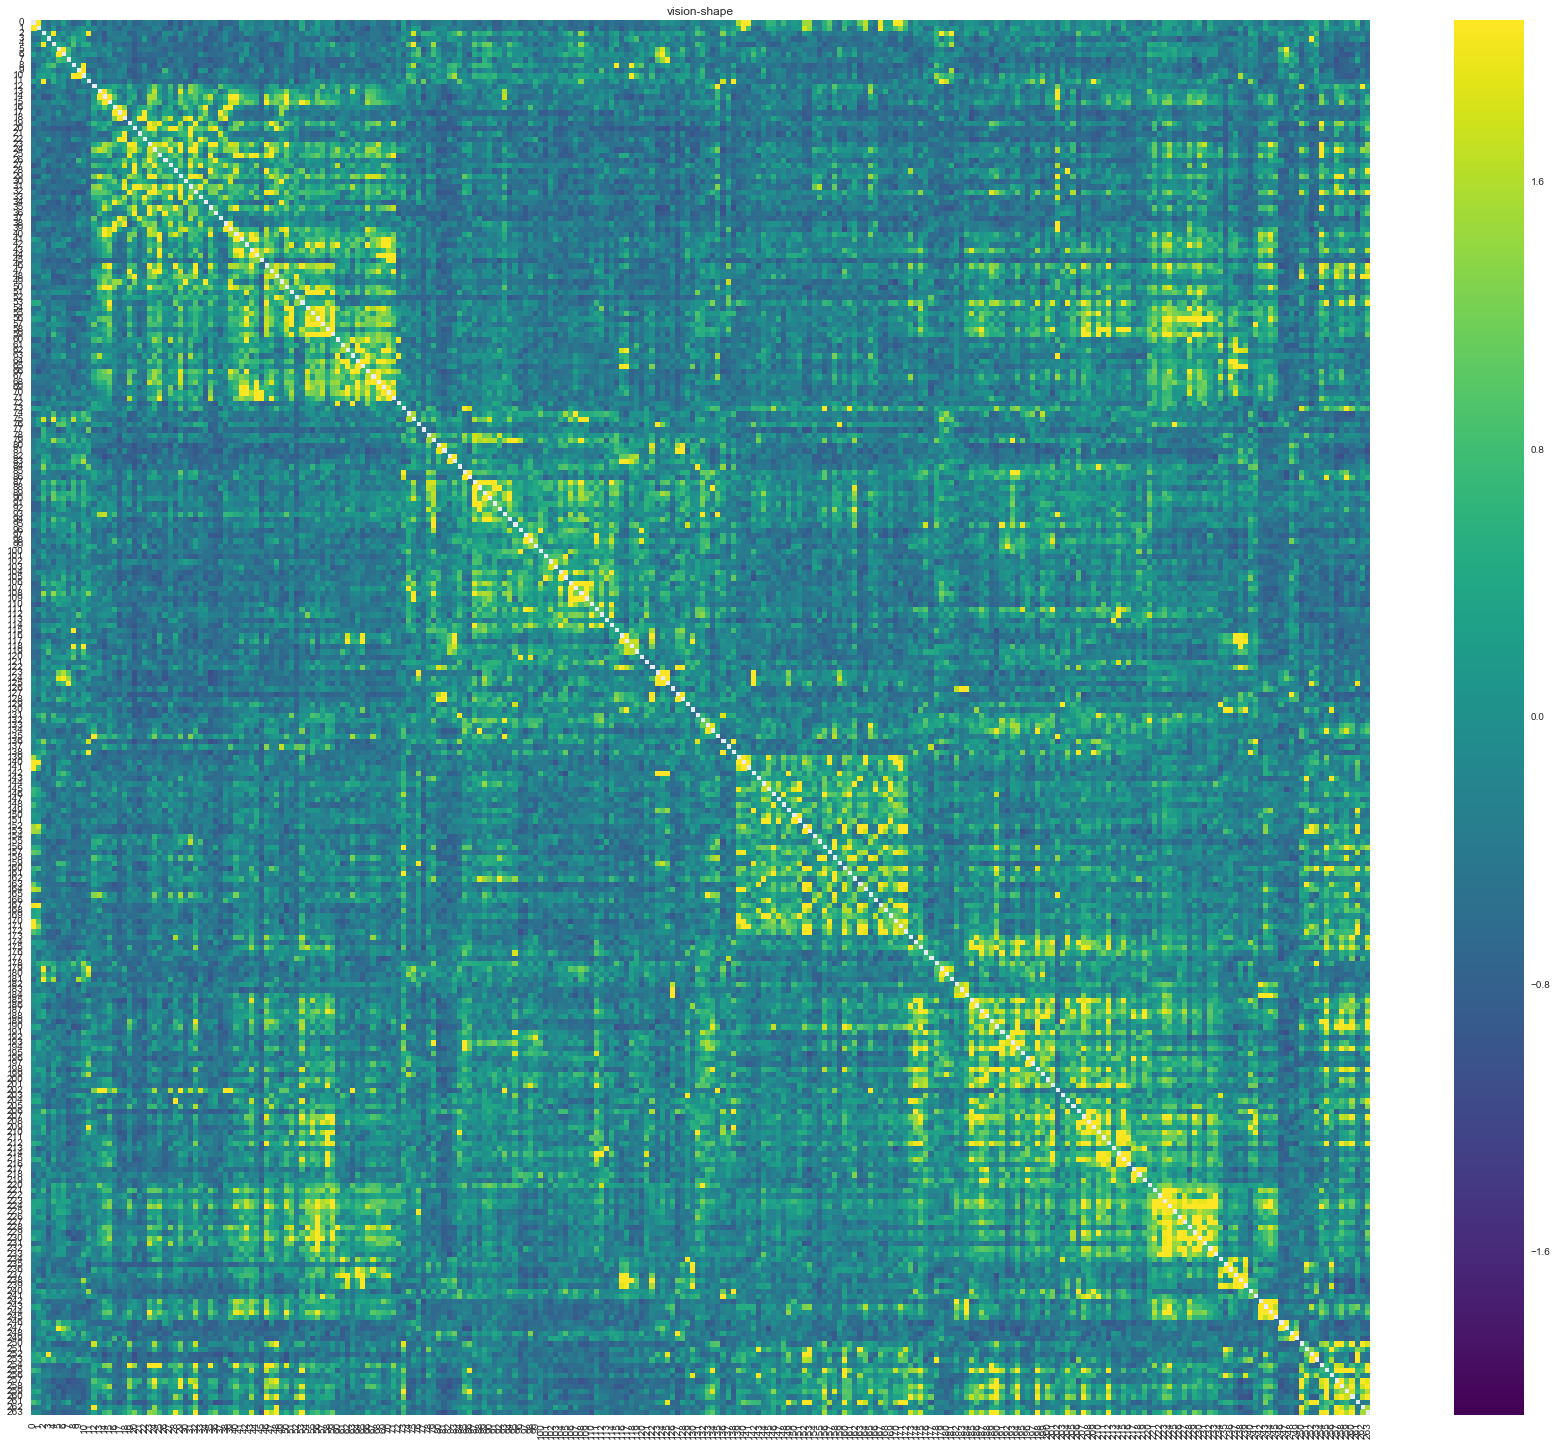

In [32]:
for topic in ['LTM', 'vision-shape']:
    heat_map_coact(coact_bytopic, topic)

In [41]:
coact_bytopic.region_a += 1
coact_bytopic.region_b += 1

In [42]:
coact_std =  coact_bytopic.groupby(['region_a', 'region_b']).std().reset_index()
average_coact_std = coact_std.groupby(['region_a']).mean().reset_index()

In [43]:
plt.figure(figsize=(40, 30))
sns.heatmap(coact_std.pivot(index='region_a', columns='region_b', values='diff_dist_z'), cmap=plt.get_cmap('viridis'), yticklabels = roi_communities.community)

ValueError: Arrays were different lengths: 264 vs 0

In [55]:
coact_std = pd.merge(coact_std, roi_communities, left_on='region_a', right_on='region').drop(
    'region', axis=1).rename(columns={'community' : 'community_a', 'comm' : 'comm_a'})
coact_std = pd.merge(coact_std, roi_communities, left_on='region_b', right_on='region').drop(
    'region', axis=1).rename(columns={'community' : 'community_b', 'comm' : 'comm_b'})
coact_std['within'] = coact_std.community_a == coact_std.community_b

In [56]:
coact_std.groupby(['comm_a', 'within']).mean().reset_index().sort('diff_dist_z')

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,comm_a,within,region_a,region_b,Unnamed: 0,feature_distance,other_distance,feature_distance_z,other_distance_z,diff_dist_z
8,Default,False,104.344828,140.427184,0,0.039612,0.011959,0.428353,0.145490,0.508938
20,UC,False,108.464286,135.351695,0,0.039354,0.012090,0.429405,0.148183,0.511639
24,Visual,False,158.000000,129.107296,0,0.040080,0.012165,0.433273,0.148250,0.516348
10,FPN,False,188.720000,126.619247,0,0.039967,0.012521,0.433130,0.153986,0.518791
6,DAtt,False,258.454545,127.023715,0,0.040687,0.012618,0.441344,0.153203,0.528043
16,Sens_hand,False,36.063981,143.362598,0,0.041030,0.012168,0.446022,0.150783,0.530376
14,Salience,False,211.500000,126.719512,0,0.040965,0.012674,0.443132,0.156388,0.531687
22,VAtt,False,227.333333,129.152941,0,0.040891,0.013068,0.443490,0.156986,0.531964
18,Subcortical,False,228.000000,127.553785,0,0.041712,0.012367,0.453147,0.154903,0.540292
0,Auditory,False,67.000000,135.892430,0,0.041958,0.012856,0.453776,0.157443,0.543203


In [57]:
### Should be provicial hubs, region high on within network variability

In [59]:
coact_std.groupby(['comm_a']).mean().reset_index().sort('feature_distance_z')

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,comm_a,region_a,region_b,Unnamed: 0,feature_distance,other_distance,feature_distance_z,other_distance_z,diff_dist_z,within
10,UC,108.464286,132.5,0,0.039916,0.012245,0.440336,0.151902,0.524639,0.106061
5,FPN,188.720000,132.5,0,0.040361,0.012645,0.442939,0.158072,0.531197,0.094697
3,DAtt,258.454545,132.5,0,0.040982,0.012867,0.448721,0.156758,0.537443,0.041667
11,VAtt,227.333333,132.5,0,0.040959,0.013129,0.449076,0.159123,0.538866,0.034091
7,Salience,211.500000,132.5,0,0.041165,0.012728,0.449574,0.158625,0.539555,0.068182
12,Visual,158.000000,132.5,0,0.041125,0.012518,0.449645,0.153800,0.535823,0.117424
4,Default,104.344828,132.5,0,0.041286,0.012412,0.450821,0.152652,0.535465,0.219697
9,Subcortical,228.000000,132.5,0,0.041968,0.012449,0.462187,0.158234,0.551528,0.049242
1,CON,53.500000,132.5,0,0.042528,0.012829,0.464230,0.162525,0.557332,0.053030
0,Auditory,67.000000,132.5,0,0.042580,0.012988,0.464982,0.161023,0.556554,0.049242


In [44]:
average_coact_std.g

AttributeError: 'DataFrame' object has no attribute 'g'

In [45]:
tools.make_mask_map(average_coact_std.feature_distance_z, img_name, 'feature_dist_var.nii.gz')

NameError: name 'tools' is not defined

In [46]:
average_within_between = coact_std.groupby(['region_a', 'within']).mean().reset_index()

KeyError: 'within'

In [ ]:
tools.make_mask_map(average_within_between[average_within_between.within == False].feature_distance_z, img_name, 'feature_dist_var_between.nii.gz')
tools.make_mask_map(average_within_between[average_within_between.within == True].feature_distance_z, img_name, 'feature_dist_var_within.nii.gz')

In [47]:
average_within_between[average_within_between.within == True]

NameError: name 'average_within_between' is not defined

In [53]:
average_coact_std

,region_a,region_b,Unnamed: 0,feature_distance,other_distance,feature_distance_z,other_distance_z,diff_dist_z,region,community,comm
0,1,132.5,0,0.040160,0.012628,0.445636,0.156757,0.532644,1,Uncertain,UC
1,2,132.5,0,0.038477,0.013024,0.435985,0.159752,0.528210,2,Uncertain,UC
2,3,132.5,0,0.040564,0.012287,0.449858,0.152078,0.536350,3,Uncertain,UC
3,4,132.5,0,0.037245,0.011423,0.417186,0.143282,0.498704,4,Uncertain,UC
4,5,132.5,0,0.043120,0.011676,0.465610,0.146031,0.545404,5,Uncertain,UC
5,6,132.5,0,0.041374,0.013446,0.451113,0.159556,0.539004,6,Uncertain,UC
6,7,132.5,0,0.038595,0.013647,0.423363,0.160901,0.511012,7,Uncertain,UC
7,8,132.5,0,0.039615,0.012236,0.433628,0.148612,0.520754,8,Uncertain,UC
8,9,132.5,0,0.037676,0.011505,0.419689,0.144291,0.498643,9,Uncertain,UC
9,10,132.5,0,0.036441,0.009572,0.411250,0.120155,0.480222,10,Uncertain,UC


In [48]:
average_coact_std = pd.merge(average_coact_std, roi_communities, left_on='region_a', right_on='region')

In [49]:
average_coact_std.groupby('comm').mean().sort('diff_dist_z')

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,region_a,region_b,Unnamed: 0,feature_distance,other_distance,feature_distance_z,other_distance_z,diff_dist_z,region
comm,,,,,,,,,
UC,108.464286,132.5,0,0.039916,0.012245,0.440336,0.151902,0.524639,108.464286
FPN,188.720000,132.5,0,0.040361,0.012645,0.442939,0.158072,0.531197,188.720000
Default,104.344828,132.5,0,0.041286,0.012412,0.450821,0.152652,0.535465,104.344828
Visual,158.000000,132.5,0,0.041125,0.012518,0.449645,0.153800,0.535823,158.000000
DAtt,258.454545,132.5,0,0.040982,0.012867,0.448721,0.156758,0.537443,258.454545
VAtt,227.333333,132.5,0,0.040959,0.013129,0.449076,0.159123,0.538866,227.333333
Salience,211.500000,132.5,0,0.041165,0.012728,0.449574,0.158625,0.539555,211.500000
Subcortical,228.000000,132.5,0,0.041968,0.012449,0.462187,0.158234,0.551528,228.000000
Auditory,67.000000,132.5,0,0.042580,0.012988,0.464982,0.161023,0.556554,67.000000


In [52]:
average_coact_std.groupby(['within', 'comm']).mean().sort('feature_distance')

KeyError: 'within'

In [51]:
from nilearn import plotting as niplt

In [40]:
niplt.plot_img('feature_dist_var_between.nii.gz', threshold=.3)